# DRAFT - SKELETON ANIMATION

In [10]:
pwd

'/Users/flavienvidal/MAPINF630/IDEMIA'

2 locations for IDEMIA projects:<br>
- '/Users/flavienvidal/Downloads/to_recover/idemia'<br>
- '/Users/flavienvidal/MAPINF630/IDEMIA'<br>

In [11]:
ls /Users/flavienvidal/Downloads/to_recover/idemia

Configuration_of_25_body_joints_in_our_dataset.png
Configuration_of_25_body_joints_in_our_dataset_SMALL.png
joint_properities.png
nturgbd_skeletons_s001_to_s017.zip
technologies-1024x853.png


In [12]:
ls

HumanActionRecognition/ a08/                    draft_animation.ipynb
Untitled.ipynb          data_bis.npy
Untitled1.ipynb         data_to_get_rid_of.npy


In [13]:
ls /Users/flavienvidal/MAPINF630/IDEMIA/HumanActionRecognition/flavien/data/subset_nturgbd_skeletons/S001C001P001R001A001.skeleton

/Users/flavienvidal/MAPINF630/IDEMIA/HumanActionRecognition/flavien/data/subset_nturgbd_skeletons/S001C001P001R001A001.skeleton


In [14]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device : {}".format(device))

device : cpu


In [15]:
#file_name = "/Users/flavienvidal/Downloads/to_recover/idemia/subset_nturgbd_skeletons/S001C001P001R001A001.skeleton"
file_name = '/Users/flavienvidal/MAPINF630/IDEMIA/HumanActionRecognition/flavien/data/subset_nturgbd_skeletons/S001C001P001R001A001.skeleton'

In [16]:
ls /Users/flavienvidal/MAPINF630/IDEMIA/HumanActionRecognition/flavien/data/subset_nturgbd_skeletons/

S001C001P001R001A001.skeleton  S001C002P004R002A030.skeleton
S001C001P001R001A002.skeleton  S001C002P004R002A031.skeleton
S001C001P001R001A003.skeleton  S001C002P004R002A032.skeleton
S001C001P001R001A004.skeleton  S001C002P004R002A033.skeleton
S001C001P001R001A005.skeleton  S001C002P004R002A034.skeleton
S001C001P001R001A006.skeleton  S001C002P004R002A035.skeleton
S001C001P001R001A007.skeleton  S001C002P004R002A036.skeleton
S001C001P001R001A008.skeleton  S001C002P004R002A037.skeleton
S001C001P001R001A009.skeleton  S001C002P004R002A038.skeleton
S001C001P001R001A010.skeleton  S001C002P004R002A039.skeleton
S001C001P001R001A011.skeleton  S001C002P004R002A040.skeleton
S001C001P001R001A012.skeleton  S001C002P004R002A041.skeleton
S001C001P001R001A013.skeleton  S001C002P004R002A042.skeleton
S001C001P001R001A014.skeleton  S001C002P004R002A043.skeleton
S001C001P001R001A015.skeleton  S001C002P004R002A044.skeleton
S001C001P001R001A016.skeleton  S001C002P004R002A045.skeleton
S001C001P001R001A017.ske

In [17]:
root_dir = "/Users/flavienvidal/Downloads/to_recover/idemia"
file_names = os.listdir(root_dir)
file_names.sort()

In [19]:
file_names

['.DS_Store',
 'Configuration_of_25_body_joints_in_our_dataset.png',
 'Configuration_of_25_body_joints_in_our_dataset_SMALL.png',
 'joint_properities.png',
 'nturgbd_skeletons_s001_to_s017.zip',
 'technologies-1024x853.png']

In [23]:
pwd

'/Users/flavienvidal/MAPINF630/IDEMIA'

In [21]:
train_array_inputs = np.load("/Users/flavienvidal/MAPINF630/IDEMIA/HumanActionRecognition/flavien/data/subset_nturgbd_skeletons")
#train_array_inputs = np.load("/Users/flavienvidal/Downloads/to_recover/idemia/subset_nturgbd_skeletons")
train_array_labels = np.load("./datasets/nturgb-d-numpy/skeletons_array_train_labels_S")

test_array_inputs = np.load("./datasets/nturgb-d-numpy/skeletons_array_test_S")
test_array_labels = np.load("./datasets/nturgb-d-numpy/skeletons_array_test_labels_S")

IsADirectoryError: [Errno 21] Is a directory: '/Users/flavienvidal/MAPINF630/IDEMIA/HumanActionRecognition/flavien/data/subset_nturgbd_skeletons'

In [32]:
# OLD
file_name = "/Users/flavienvidal/Downloads/to_recover/idemia/subset_nturgbd_skeletons/S001C001P001R001A001.skeleton"

# NEW 
file_name = "/Users/flavienvidal/MAPINF630/IDEMIA/HumanActionRecognition/flavien/data/subset_nturgbd_skeletons/S001C001P001R001A001.skeleton"

read data done!
(3, 103, 25, 2)


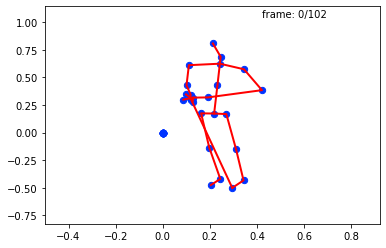

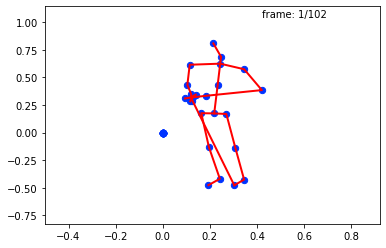

In [33]:
import numpy as np
import matplotlib.pyplot as plt

max_V = 25 #Number of nodes
max_M = 2 #Number of skeletons
with open(file_name, 'r') as fr:
    frame_num = int(fr.readline())
    point = np.zeros((3, frame_num, 25, 2))
    for frame in range(frame_num):
        person_num = int(fr.readline())
        for person in range(person_num):
            fr.readline()
            joint_num = int(fr.readline())
            for joint in range(joint_num):
                v = fr.readline().split(' ')
                if joint < max_V and person < max_M:
                    point[0,frame,joint,person] = float(v[0])#A coordinate of a joint
                    point[1,frame,joint,person] = float(v[1])
                    point[2,frame,joint,person] = float(v[2])

print('read data done!')
print(point.shape)

#Select the appropriate coordinate axis through the maximum and minimum coordinate values 
xmax= np.max(point[0, :, :, :])+ 0.5
xmin= np.min(point[0, :, :, :])- 0.5
ymax= np.max(point[1, :, :, :])+ 0.3
ymin= np.min(point[1, :, :, :])- 0.3
zmax= np.max(point[2, :, :, :])
zmin= np.min(point[2, :, :, :])
 
row= point.shape[1] #How many frames are there
 
 
# Determine which nodes are connected as bones according to NTU skeleton structure
# Note that the sequence number starts from 0 and needs to be minus 1
arms= np.array([24,12,11,10,9,21,5,6,7,8,20])-1 #Arms
rightHand= np.array([12,25])-1 #one 's right hand
leftHand= np.array([8,23])-1 #left hand
legs= np.array([20,19,18,17,1,13,14,15,16]) - 1 #leg
body= np.array([4,3,21,2,1]) -1  #body
 
n= 0     # Show from frame n
m= 2 # At the end of frame m, n < m < row, this m can select a threshold less than the maximum number of frames for easy viewing. If m=1, a frame will be displayed
plt.figure()
plt.ion() #Use plt.ion() to convert the display mode of matplotlib to interactive mode. Even if plt.show() is encountered in the script, the code will continue to execute.
color_point = '#03ff' #Joint point color, which can be input into the hexadecimal palette
color_bone = 'red' #Bone color
for i in range(n, m):
    plt.cla() ## Clear axis clears the currently active axis in the current drawing. Other axes are not affected.
    plt.scatter(point[0, i, :, :], point[1, i, :, :], c=color_point, s=40.0) #Drawing joint points through scatter diagram
    #Draw the connecting line between two points through the line diagram, that is, the bone
    plt.plot(point[0, i, arms,0], point[1, i, arms,0], c=color_bone, lw=2.0) 
    plt.plot(point[0, i, rightHand,0], point[1, i, rightHand,0], c=color_bone, lw=2.0)
    plt.plot(point[0, i, leftHand,0], point[1, i, leftHand,0], c=color_bone, lw=2.0)
    plt.plot(point[0, i, legs,0], point[1, i, legs,0], c=color_bone, lw=2.0)
    plt.plot(point[0, i, body,0], point[1, i, body,0], c=color_bone, lw=2.0)
    
    #Second skeleton, if any
    plt.plot(point[0, i, arms,1], point[1, i, arms,1], c=color_bone, lw=2.0)
    plt.plot(point[0, i, rightHand,1], point[1, i, rightHand,1], c=color_bone, lw=2.0)
    plt.plot(point[0, i, leftHand,1], point[1, i, leftHand,1], c=color_bone, lw=2.0)
    plt.plot(point[0, i, legs,1], point[1, i, legs,1], c=color_bone, lw=2.0)
    plt.plot(point[0, i, body,1], point[1, i, body,1], c=color_bone, lw=2.0)
     
    plt.text(xmax-0.5, ymax-0.1,'frame: {}/{}'.format(i, row-1)) #What frame is this
    # plt.text(xmax-0.8, ymax-0.4, 'label: ' + str(label[i]))
    plt.xlim(xmin, xmax) #Coordinate axis
    plt.ylim(ymin, ymax)
    plt.pause(0.001)
 
plt.ioff()
plt.show()

In [37]:
ls

HumanActionRecognition/ a08/                    draft_animation.ipynb
Untitled.ipynb          data_bis.npy
Untitled1.ipynb         data_to_get_rid_of.npy


In [49]:
data = np.load("./data_to_get_rid_of.npy")
data_bis = np.load("./data_bis.npy")

In [50]:
data

array([[[[0.2181153 , 0.        ],
         [0.2323292 , 0.        ],
         [0.2457799 , 0.        ],
         ...,
         [0.0989792 , 0.        ],
         [0.08710064, 0.        ],
         [0.1268453 , 0.        ]],

        [[0.2184443 , 0.        ],
         [0.2332372 , 0.        ],
         [0.2472661 , 0.        ],
         ...,
         [0.1398538 , 0.        ],
         [0.09427723, 0.        ],
         [0.1166691 , 0.        ]],

        [[0.2182214 , 0.        ],
         [0.2331048 , 0.        ],
         [0.2471501 , 0.        ],
         ...,
         [0.1213269 , 0.        ],
         [0.09587754, 0.        ],
         [0.1219285 , 0.        ]],

        ...,

        [[0.219612  , 0.        ],
         [0.2499196 , 0.        ],
         [0.2790676 , 0.        ],
         ...,
         [0.1714538 , 0.        ],
         [0.1413675 , 0.        ],
         [0.1269481 , 0.        ]],

        [[0.2199141 , 0.        ],
         [0.2506548 , 0.        ],
         [0.

In [51]:
data_bis

array([[[[-2.01791942e-03, -3.51584951e-03, -4.15080583e-03],
         [ 1.21959806e-02,  2.56550550e-01, -7.49308058e-02],
         [ 2.56466806e-02,  5.11611850e-01, -1.55800806e-01],
         ...,
         [-1.21154019e-01,  1.69848350e-01, -2.62158806e-01],
         [-1.33032579e-01,  1.22775850e-01, -2.43507806e-01],
         [-9.32879194e-02,  1.05283250e-01, -2.40172806e-01]],

        [[-1.68891942e-03, -2.41124951e-03, -4.63805825e-04],
         [ 1.31039806e-02,  2.57203450e-01, -7.10108058e-02],
         [ 2.71328806e-02,  5.11752550e-01, -1.51619806e-01],
         ...,
         [-8.02794194e-02,  1.68374550e-01, -2.48897806e-01],
         [-1.25855989e-01,  1.33691250e-01, -2.16621806e-01],
         [-1.03464119e-01,  1.07778550e-01, -2.28919806e-01]],

        [[-1.91181942e-03, -2.26764951e-03,  9.37194175e-04],
         [ 1.29715806e-02,  2.57630850e-01, -7.03468058e-02],
         [ 2.70168806e-02,  5.12465450e-01, -1.51367806e-01],
         ...,
         [-9.88063194e-0

In [52]:
data_bis.shape

(2, 103, 25, 3)

In [53]:
data.shape

(3, 103, 25, 2)

In [58]:
data[:,[1, 2]].shape

(3, 2, 25, 2)

In [60]:
ntu_skeleton_bone_pairs = tuple((i-1, j-1) for (i,j) in (
    (1, 2), (2, 21), (3, 21), (4, 3), (5, 21), (6, 5),
    (7, 6), (8, 7), (9, 21), (10, 9), (11, 10), (12, 11),
    (13, 1), (14, 13), (15, 14), (16, 15), (17, 1), (18, 17),
    (19, 18), (20, 19), (22, 23), (21, 21), (23, 8), (24, 25),(25, 12)
))


ax.clear()
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
for i, j in ntu_skeleton_bone_pairs:
    joint_locs = data[:,[i,j]]
    # plot them
    ax.plot(joint_locs[0],joint_locs[1],joint_locs[2], color='blue')

action_class = labels[1][index] + 1
action_name = actions[action_class]
plt.title('Skeleton {} Frame #{} of 300 from {}\n (Action {}: {})'.format(index, skeleton_index[0], args.dataset, action_class, action_name))
skeleton_index[0] += 1
return ax

ValueError: x and y can be no greater than 2-D, but have shapes (2, 25, 2) and (2, 25, 2)

In [38]:

        
for frame_idx in range(data.shape[1]):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.view_init(elev=25, azim=25)



    plt.cla()
    plt.title("Frame: {}".format(frame_idx))

    ax.set_xlim3d([-1, 1])
    ax.set_ylim3d([-1, 1])
    ax.set_zlim3d([-0.8, 0.8])

    x = data[0, frame_idx, :, 0]
    y = data[0, frame_idx, :, 1]
    z = data[0, frame_idx, :, 2]

    for part in body_joints:
        x_plot = x[part]
        y_plot = y[part]
        z_plot = z[part]
        ax.plot(x_plot, z_plot, y_plot, color='b', marker='o', markerfacecolor='r')

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')


    ax.set_facecolor('none')
    plt.pause(0.2)

plt.ioff()
ax.axis('off')
plt.show()



NameError: name 'Axes3D' is not defined

<Figure size 432x288 with 0 Axes>

In [39]:
import os
import sys
import pickle
import argparse
import numpy as np
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


ntu_skeleton_bone_pairs = tuple((i-1, j-1) for (i,j) in (
    (1, 2), (2, 21), (3, 21), (4, 3), (5, 21), (6, 5),
    (7, 6), (8, 7), (9, 21), (10, 9), (11, 10), (12, 11),
    (13, 1), (14, 13), (15, 14), (16, 15), (17, 1), (18, 17),
    (19, 18), (20, 19), (22, 23), (21, 21), (23, 8), (24, 25),(25, 12)
))

bone_pairs = {
    'ntu/xview': ntu_skeleton_bone_pairs,
    'ntu/xsub': ntu_skeleton_bone_pairs,

    # NTU 120 uses the same skeleton structure as NTU 60
    'ntu120/xsub': ntu_skeleton_bone_pairs,
    'ntu120/xset': ntu_skeleton_bone_pairs,

    # NTU general
    'ntu': ntu_skeleton_bone_pairs,
}

bone_pairs

{'ntu/xview': ((0, 1),
  (1, 20),
  (2, 20),
  (3, 2),
  (4, 20),
  (5, 4),
  (6, 5),
  (7, 6),
  (8, 20),
  (9, 8),
  (10, 9),
  (11, 10),
  (12, 0),
  (13, 12),
  (14, 13),
  (15, 14),
  (16, 0),
  (17, 16),
  (18, 17),
  (19, 18),
  (21, 22),
  (20, 20),
  (22, 7),
  (23, 24),
  (24, 11)),
 'ntu/xsub': ((0, 1),
  (1, 20),
  (2, 20),
  (3, 2),
  (4, 20),
  (5, 4),
  (6, 5),
  (7, 6),
  (8, 20),
  (9, 8),
  (10, 9),
  (11, 10),
  (12, 0),
  (13, 12),
  (14, 13),
  (15, 14),
  (16, 0),
  (17, 16),
  (18, 17),
  (19, 18),
  (21, 22),
  (20, 20),
  (22, 7),
  (23, 24),
  (24, 11)),
 'ntu120/xsub': ((0, 1),
  (1, 20),
  (2, 20),
  (3, 2),
  (4, 20),
  (5, 4),
  (6, 5),
  (7, 6),
  (8, 20),
  (9, 8),
  (10, 9),
  (11, 10),
  (12, 0),
  (13, 12),
  (14, 13),
  (15, 14),
  (16, 0),
  (17, 16),
  (18, 17),
  (19, 18),
  (21, 22),
  (20, 20),
  (22, 7),
  (23, 24),
  (24, 11)),
 'ntu120/xset': ((0, 1),
  (1, 20),
  (2, 20),
  (3, 2),
  (4, 20),
  (5, 4),
  (6, 5),
  (7, 6),
  (8, 20),
  (9, 8)

In [41]:
data_path_true = "/Users/flavienvidal/MAPINF630/IDEMIA/HumanActionRecognition/flavien/data/subset_nturgbd_skeletons"
data_path = "/Users/flavienvidal/MAPINF630/IDEMIA/HumanActionRecognition/flavien/data/subset_nturgbd_skeletons/S001C001P001R001A001.skeleton"
label_path = "/Users/flavienvidal/MAPINF630/IDEMIA/HumanActionRecognition/flavien/data/action_labels.py"

In [43]:
data = np.load(data_path, mmap_mode='r')

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [44]:
bones = bone_pairs["ntu/xview"] 

ax.clear()
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
for i, j in bones:
    joint_locs = skeleton[:,[i,j]]
    # plot them
    ax.plot(joint_locs[0],joint_locs[1],joint_locs[2], color='blue')



NameError: name 'ax' is not defined

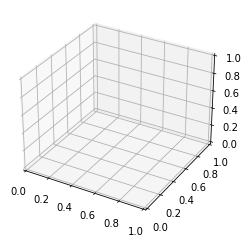

In [45]:
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')


In [46]:
import os
import sys
import pickle
import argparse
import numpy as np
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


ntu_skeleton_bone_pairs = tuple((i-1, j-1) for (i,j) in (
    (1, 2), (2, 21), (3, 21), (4, 3), (5, 21), (6, 5),
    (7, 6), (8, 7), (9, 21), (10, 9), (11, 10), (12, 11),
    (13, 1), (14, 13), (15, 14), (16, 15), (17, 1), (18, 17),
    (19, 18), (20, 19), (22, 23), (21, 21), (23, 8), (24, 25),(25, 12)
))

bone_pairs = {
    'ntu/xview': ntu_skeleton_bone_pairs,
    'ntu/xsub': ntu_skeleton_bone_pairs,

    # NTU 120 uses the same skeleton structure as NTU 60
    'ntu120/xsub': ntu_skeleton_bone_pairs,
    'ntu120/xset': ntu_skeleton_bone_pairs,

    # NTU general
    'ntu': ntu_skeleton_bone_pairs,
}


def visualize(datapath, labelpath, dataset, indices):

    data = np.load(data_path, mmap_mode='r')
    with open(label_path, 'rb') as f:
        labels = pickle.load(f, encoding='latin1')

    bones = bone_pairs[dataset]
    print(f'Dataset: {dataset}\n')

    def animate(skeleton):
        ax.clear()
        ax.set_xlim([-1,1])
        ax.set_ylim([-1,1])
        ax.set_zlim([-1,1])
        for i, j in bones:
            joint_locs = skeleton[:,[i,j]]
            # plot them
            ax.plot(joint_locs[0],joint_locs[1],joint_locs[2], color='blue')

        action_class = labels[1][index] + 1
        action_name = actions[action_class]
        plt.title('Skeleton {} Frame #{} of 300 from {}\n (Action {}: {})'.format(index, skeleton_index[0], dataset, action_class, action_name))
        skeleton_index[0] += 1
        return ax

    for index in indices:
        mpl.rcParams['legend.fontsize'] = 10
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.set_xlim([-1,1])
        ax.set_ylim([-1,1])
        ax.set_zlim([-1,1])

        # get data
        skeletons = data[index]
        action_class = labels[1][index] + 1
        action_name = actions[action_class]
        print(f'Sample index: {index}\nAction: {action_class}-{action_name}\n')   # (C,T,V,M)

        # Pick the first body to visualize
        skeleton1 = skeletons[..., 0]   # out (C,T,V)

        skeleton_index = [0]
        skeleton_frames = skeleton1.transpose(1,0,2)
        ani = FuncAnimation(fig, animate, skeleton_frames)

        plt.title('Skeleton {} from {} test data'.format(index, dataset))
        plt.show()


In [47]:
visualize(file_name, dataset="ntu/xview")

TypeError: visualize() missing 2 required positional arguments: 'labelpath' and 'indices'

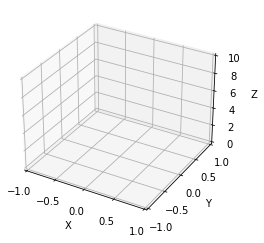

In [63]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def gen(n):
    phi = 0
    while phi < 2*np.pi:
        yield np.array([np.cos(phi), np.sin(phi), phi])
        phi += 2*np.pi/n

def update(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

N = 100
data = np.array(list(gen(N))).T
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])

# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)
#ani.save('matplot003.gif', writer='imagemagick')
plt.show()

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import sin, cos, pi, outer, ones, size, linspace

# Define x, y, z lists for sphere
a = linspace(0, 2 * pi)
b = linspace(0, pi)
x = 10 * outer(cos(a), sin(b))
y = 10 * outer(sin(a), sin(b))
z = 10 * outer(ones(size(a)), cos(b))

# The amount of frames in the animation
frames = 26

# Generate each frame
for n in range(frames):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, color=('b'))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlim(-8,8)
    ax.set_xlim(-8,8)
    ax.set_xlim(-8,8)
    plt.savefig(f"{n}.png")
    plt.close()
    
    # Add 1 to the x so the sphere moves right by 1
    x += 1

# Use pillow to save all frames as an animation in a gif file
from PIL import Image

images = [Image.open(f"{n}.png") for n in range(frames)]

images[0].save('ball.gif', save_all=True, append_images=images[1:], duration=100, loop=0)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import sin, cos, pi, outer, ones, size, linspace

# Amount of frames in the animation
numb_of_frames = skeleton_sequence['numb_of_frames']

# Generate each frame
for n in range(numb_of_frames):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, color=('b'))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlim(-8,8)
    ax.set_xlim(-8,8)
    ax.set_xlim(-8,8)
    plt.savefig(f"{n}.png")
    plt.close()
    
    # Add 1 to the x so the sphere moves right by 1
    x += 1

# Use pillow to save all frames as an animation in a gif file
from PIL import Image

images = [Image.open(f"{n}.png") for n in range(numb_of_frames)]
images[0].save('ball.gif', save_all=True, append_images=images[1:], duration=100, loop=0)



data[0][0] = [[ 0.2181153   0.1725972   3.785547  ]
 [ 0.2323292   0.4326636   3.714767  ]
 [ 0.2457799   0.6877249   3.633897  ]
 [ 0.2128507   0.8079225   3.581995  ]
 [ 0.1109304   0.6111551   3.716962  ]
 [ 0.100875    0.4286715   3.742593  ]
 [ 0.1186992   0.3428923   3.556542  ]
 [ 0.1165352   0.3173672   3.550741  ]
 [ 0.3449145   0.5740387   3.588655  ]
 [ 0.4211396   0.3847547   3.627778  ]
 [ 0.1918999   0.3189077   3.540756  ]
 [ 0.1298675   0.317039    3.542577  ]
 [ 0.162766    0.1745395   3.778471  ]
 [ 0.1975115  -0.1360554   3.904381  ]
 [ 0.2442706  -0.4201995   4.054147  ]
 [ 0.2040377  -0.476396    4.094294  ]
 [ 0.2699234   0.1678491   3.730005  ]
 [ 0.3105748  -0.1462299   3.818383  ]
 [ 0.3428889  -0.433214    3.943258  ]
 [ 0.2951482  -0.5017325   3.968896  ]
 [ 0.2425592   0.6247278   3.656055  ]
 [ 0.1200176   0.2955468   3.532409  ]
 [ 0.0989792   0.3459614   3.527539  ]
 [ 0.08710064  0.2988889   3.54619   ]
 [ 0.1268453   0.2813963   3.549525  ]]
[0, 1, 20, 

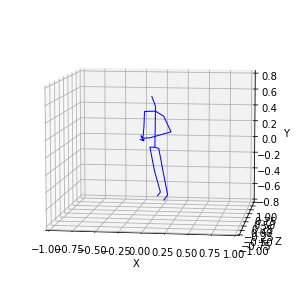

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 1 frame:


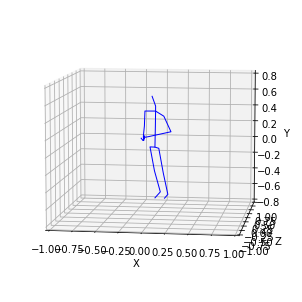

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 2 frame:


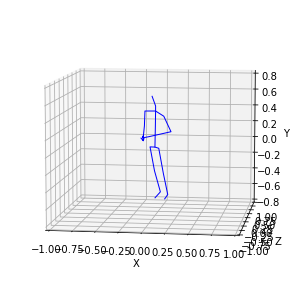

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 3 frame:


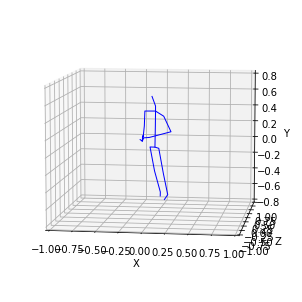

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 4 frame:


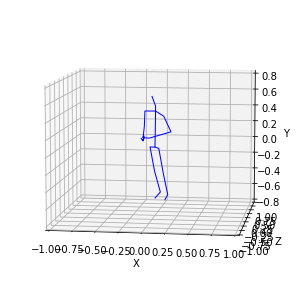

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 5 frame:


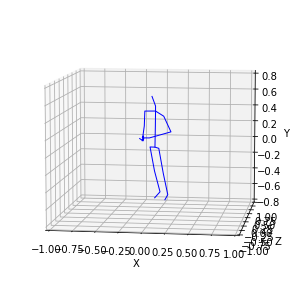

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 6 frame:


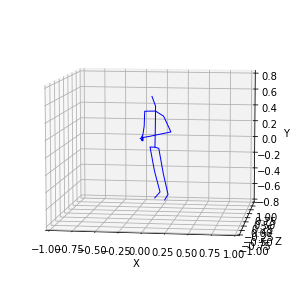

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 7 frame:


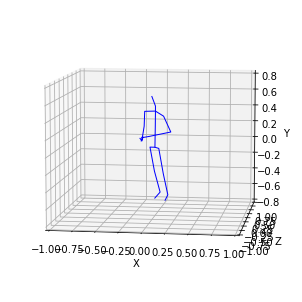

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 8 frame:


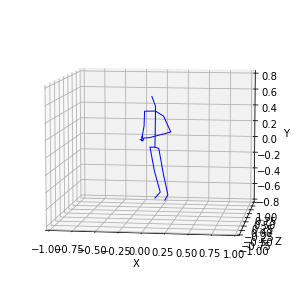

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 9 frame:


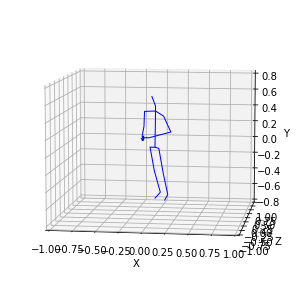

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 10 frame:


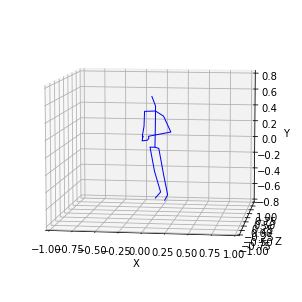

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 11 frame:


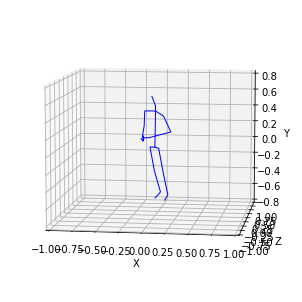

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 12 frame:


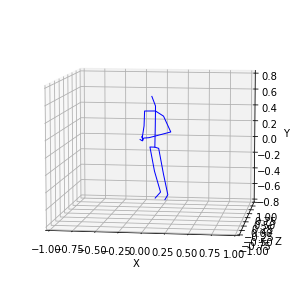

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 13 frame:


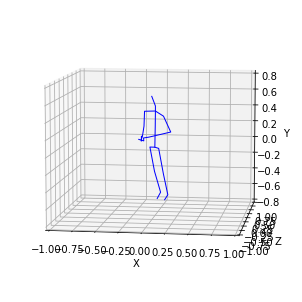

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 14 frame:


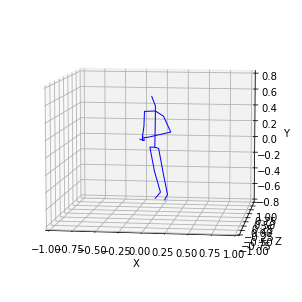

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 15 frame:


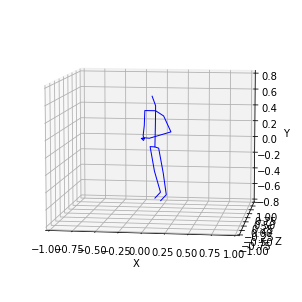

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 16 frame:


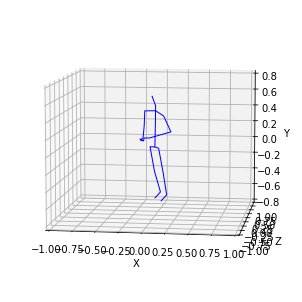

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 17 frame:


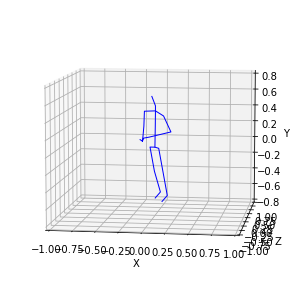

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 18 frame:


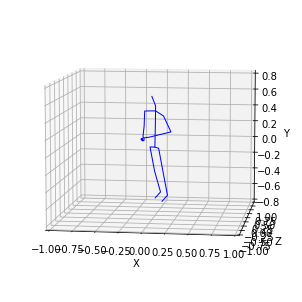

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 19 frame:


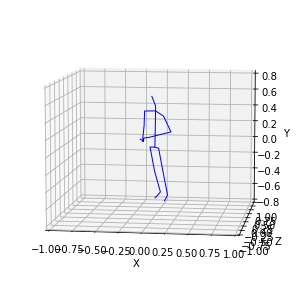

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 20 frame:


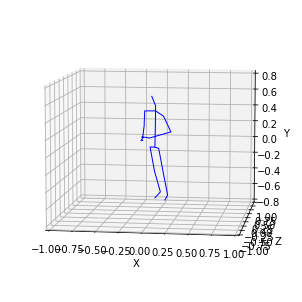

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 21 frame:


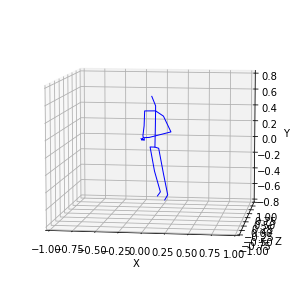

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 22 frame:


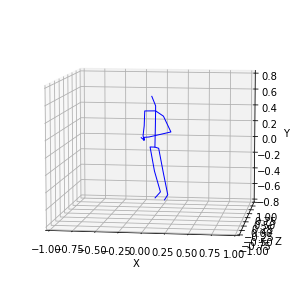

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 23 frame:


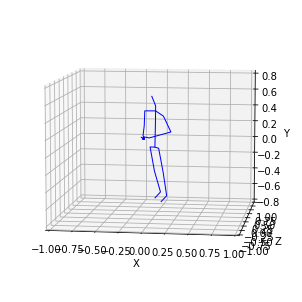

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 24 frame:


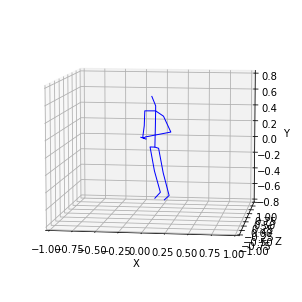

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 25 frame:


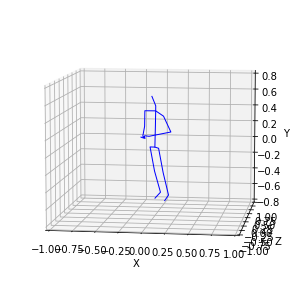

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 26 frame:


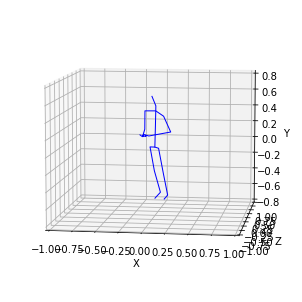

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 27 frame:


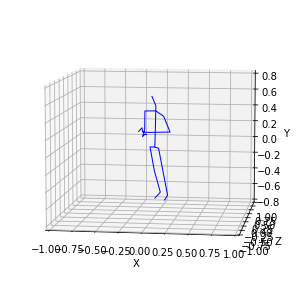

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 28 frame:


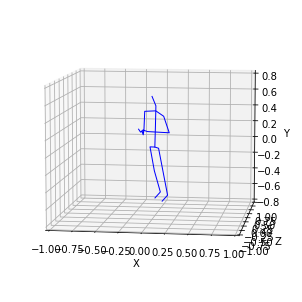

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 29 frame:


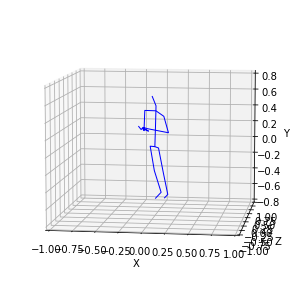

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 30 frame:


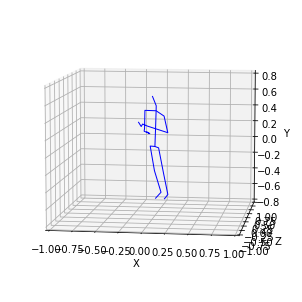

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 31 frame:


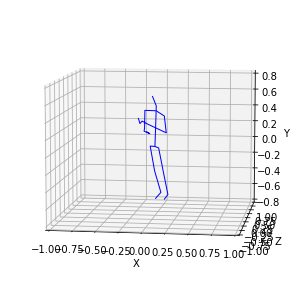

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 32 frame:


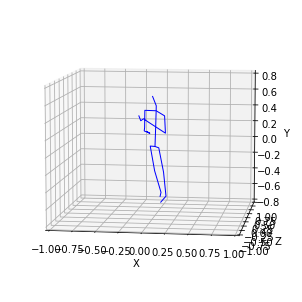

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 33 frame:


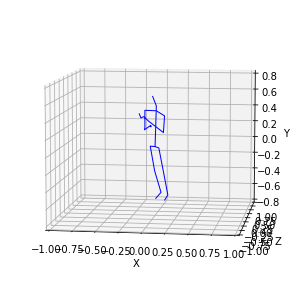

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 34 frame:


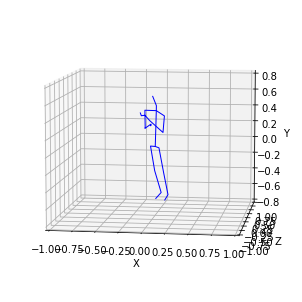

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 35 frame:


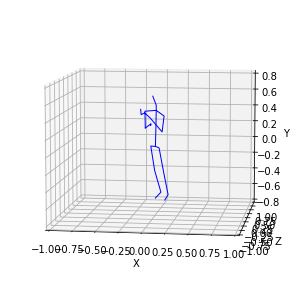

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 36 frame:


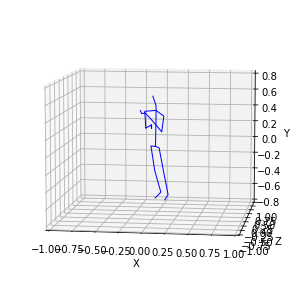

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 37 frame:


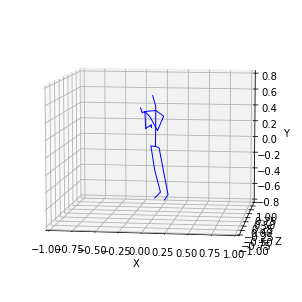

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 38 frame:


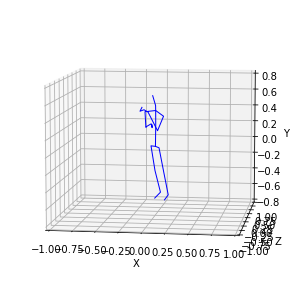

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 39 frame:


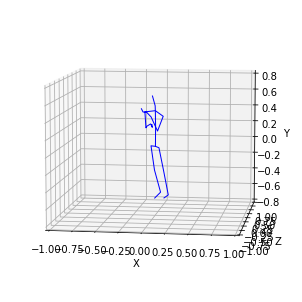

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 40 frame:


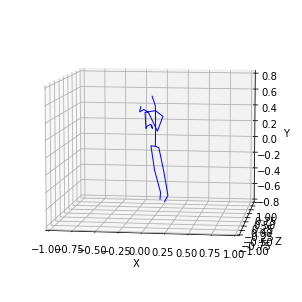

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 41 frame:


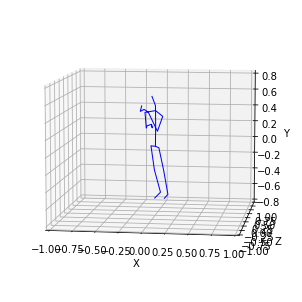

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 42 frame:


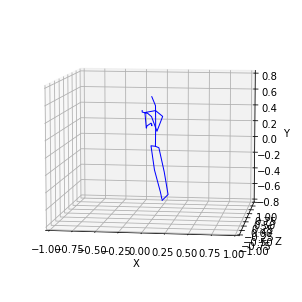

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 43 frame:


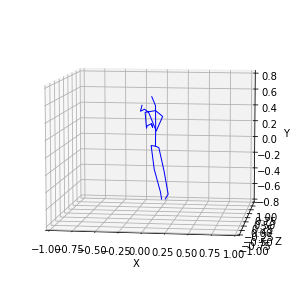

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 44 frame:


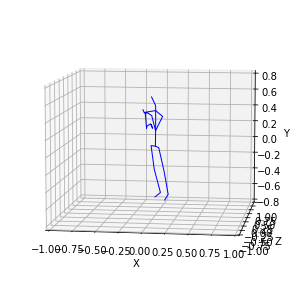

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 45 frame:


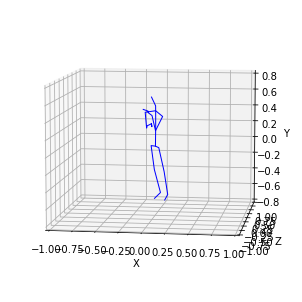

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 46 frame:


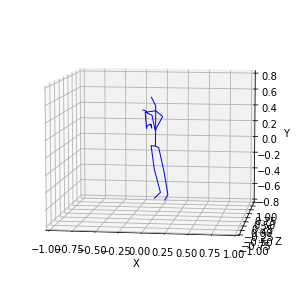

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 47 frame:


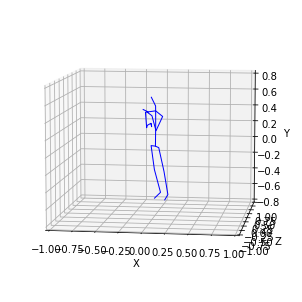

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 48 frame:


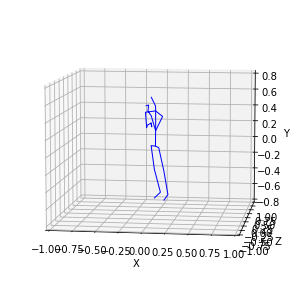

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 49 frame:


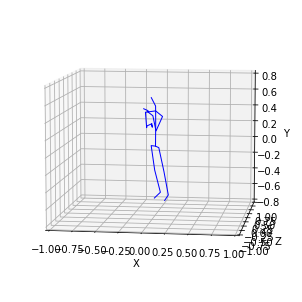

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 50 frame:


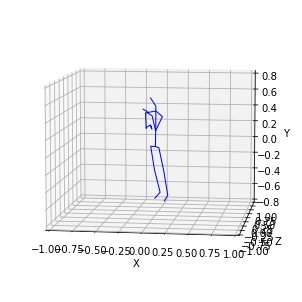

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 51 frame:


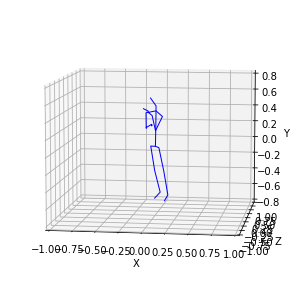

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 52 frame:


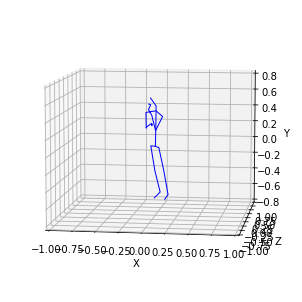

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 53 frame:


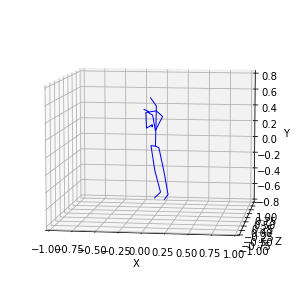

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 54 frame:


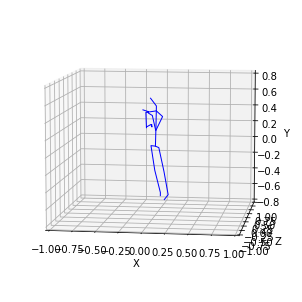

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 55 frame:


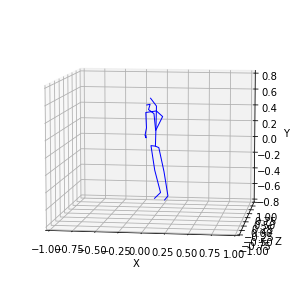

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 56 frame:


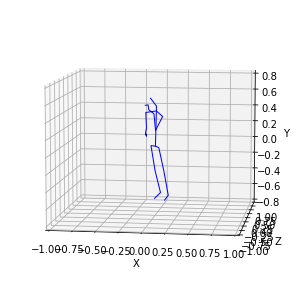

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 57 frame:


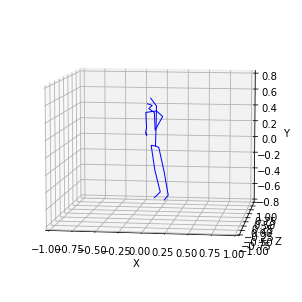

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 58 frame:


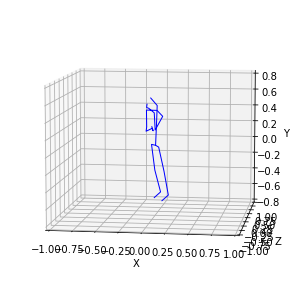

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 59 frame:


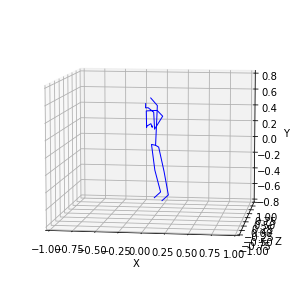

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 60 frame:


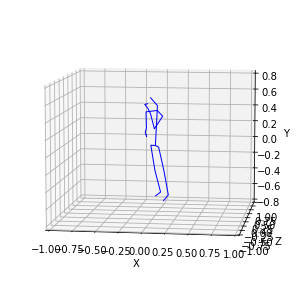

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 61 frame:


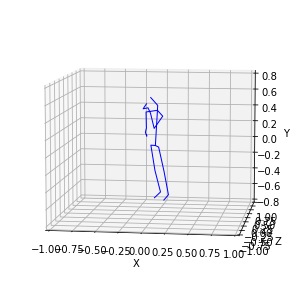

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 62 frame:


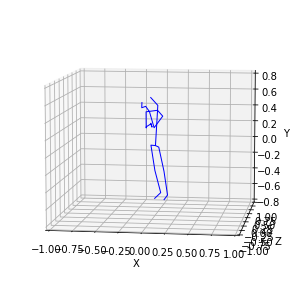

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 63 frame:


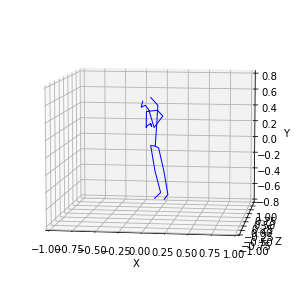

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 64 frame:


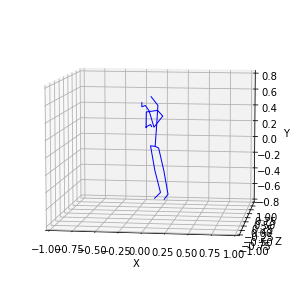

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 65 frame:


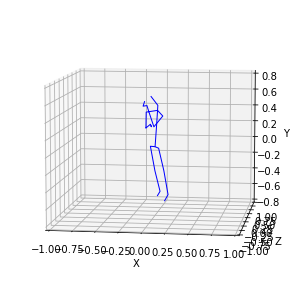

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 66 frame:


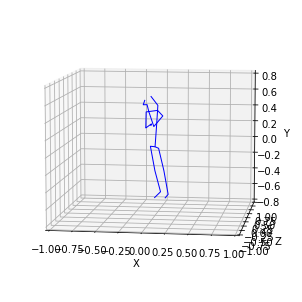

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 67 frame:


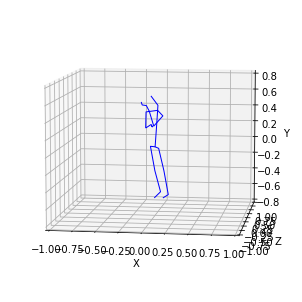

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 68 frame:


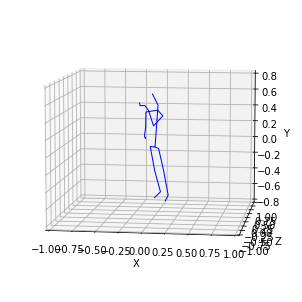

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 69 frame:


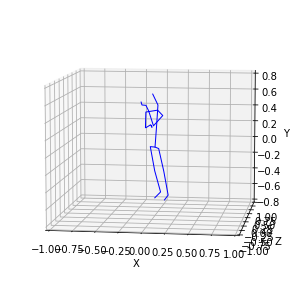

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 70 frame:


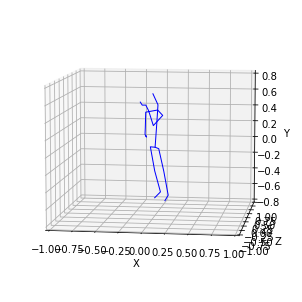

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 71 frame:


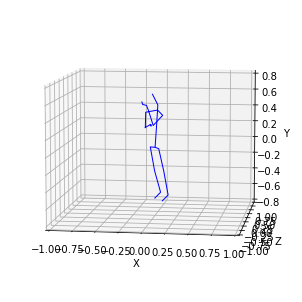

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 72 frame:


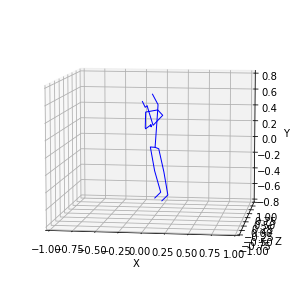

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 73 frame:


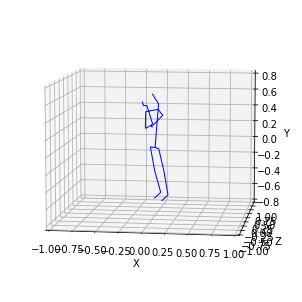

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 74 frame:


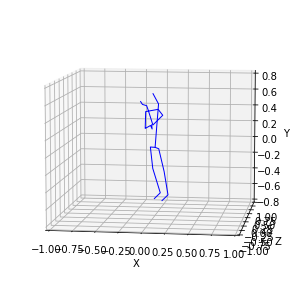

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 75 frame:


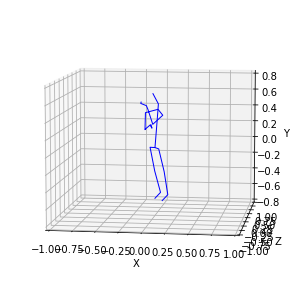

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 76 frame:


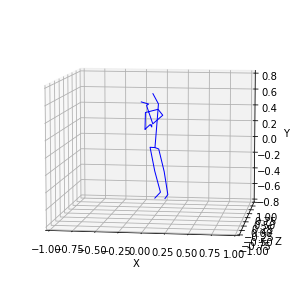

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 77 frame:


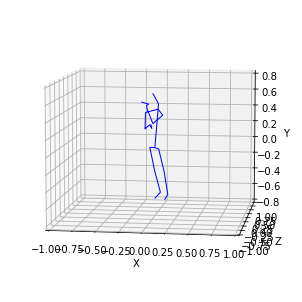

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 78 frame:


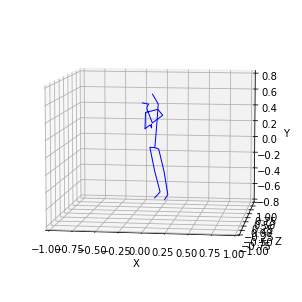

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 79 frame:


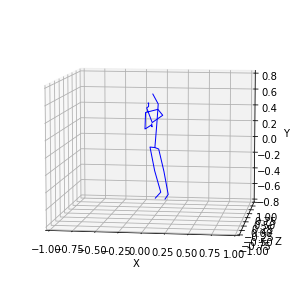

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 80 frame:


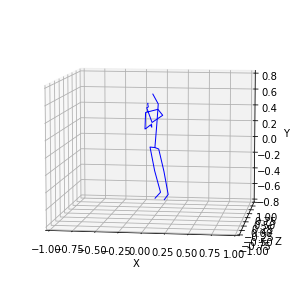

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 81 frame:


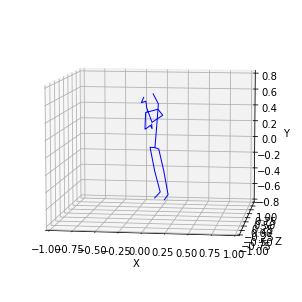

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 82 frame:


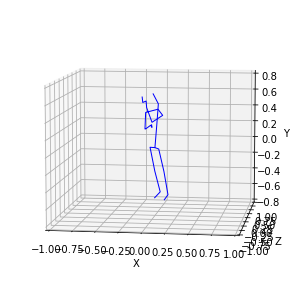

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 83 frame:


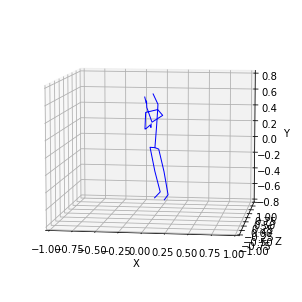

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 84 frame:


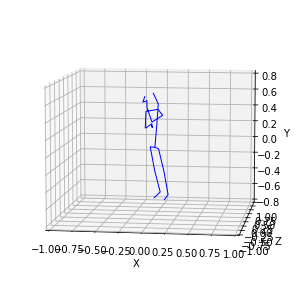

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 85 frame:


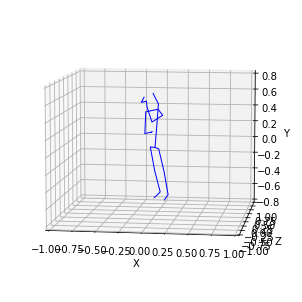

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 86 frame:


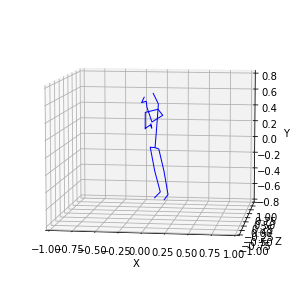

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 87 frame:


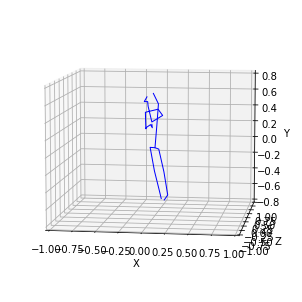

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 88 frame:


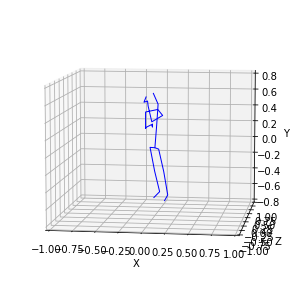

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 89 frame:


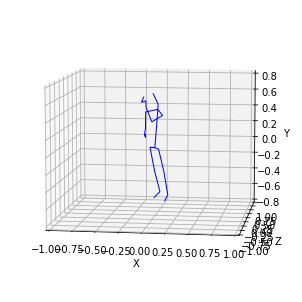

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 90 frame:


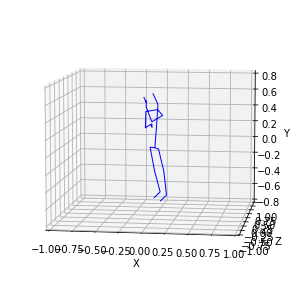

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 91 frame:


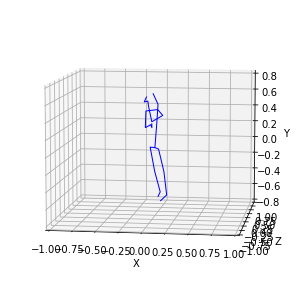

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 92 frame:


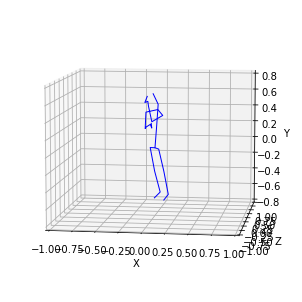

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 93 frame:


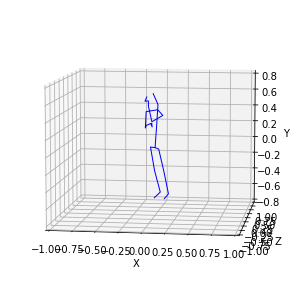

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 94 frame:


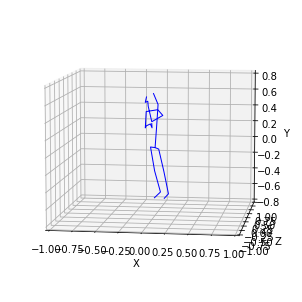

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 95 frame:


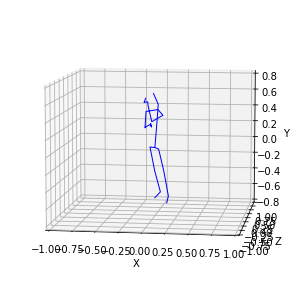

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 96 frame:


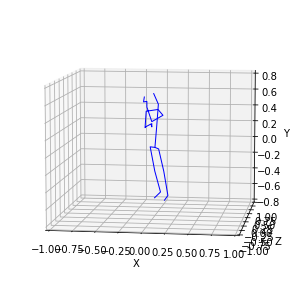

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 97 frame:


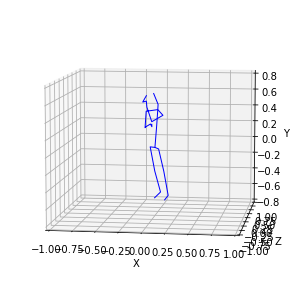

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 98 frame:


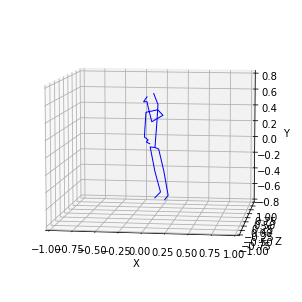

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 99 frame:


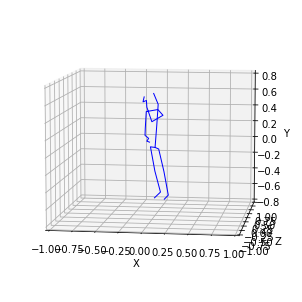

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 100 frame:


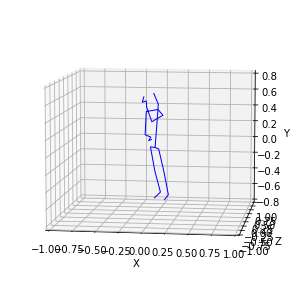

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 101 frame:


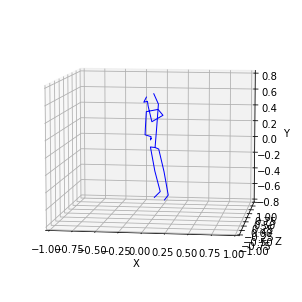

[0, 1, 20, 2, 3]
[23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
[19, 18, 17, 16, 0, 12, 13, 14, 15]
Number 102 frame:


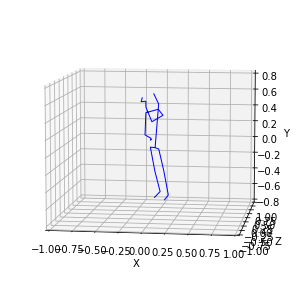

images = [<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7FFDD9A267F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7FFDD9A261C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7FFDD9A26E80>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7FFDD9BBE8B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7FFDD9C549D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7FFDD9C54FD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7FFDD9C54F10>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7FFDBF5E6280>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7FFDD9B5C730>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7FFDD983ED90>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7FFDD983E1F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7FFDD9DC6550>, <PIL.P

In [116]:
file_name = "/Users/flavienvidal/Downloads/to_recover/idemia/subset_nturgbd_skeletons/S001C001P001R001A001.skeleton"
file_name = '/Users/flavienvidal/MAPINF630/IDEMIA/HumanActionRecognition/flavien/data/subset_nturgbd_skeletons/S001C001P001R001A001.skeleton'

import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

from PIL import Image


bust_joints = [0, 1, 20, 2, 3]
right_arm_joint = [23, 24, 11, 10, 9, 8]
left_arm_joint = [21, 22, 7, 6, 5, 4]
arm_joints = [23, 24, 11, 10, 9, 8, 20, 4, 5, 6, 7, 22, 21]
right_leg_joints = []
left_leg_joints = []
leg_joints = [19, 18, 17, 16, 0, 12, 13, 14, 15]

body_joints = [bust_joints, arm_joints, leg_joints]


class Draw3DSkeleton(object):
    """Draw the 3D skeleton from NTU RGB+D dataset"""

    def __init__(self, 
                 file, 
                 save_path=None, 
                 init_horizon=-45, # elevation of the axes in degrees (not radians)
                 init_vertical=20, # azimuth of the axes in degrees (not radians)
                 x_rotation=None,
                 y_rotation=None, 
                 pause_step=0.2):


        self.file = file
        self.save_path = save_path

        if not os.path.exists(self.save_path):
            os.mkdir(self.save_path)

        self.init_horizon = init_horizon
        self.init_vertical = init_vertical

        self.x_rotation = x_rotation
        self.y_rotation = y_rotation

        self._pause_step = pause_step
        
        #self.numb_of_frames

    def _read_skeleton(self, file):
        """
        Read the .skeleton files and process the data
        
        Example of output:
        {'numb_of_frames': 103, 
         'frame_info': [{'numb_of_skeletons': 1, 
                         'skeleton_info': [{'numb_of_joints': 25, 
                                            'joint_info': [{'x': 0.2181153, 'y': 0.1725972, 'z': 3.785547, 
                                                            'depthX': 277.419, 'depthY': 191.8218, 
                                                            'colorX': 1036.233, 'colorY': 519.1677, 
                                                            'orientationW': -0.2059419, 'orientationX': 0.05349901, 
                                                            'orientationY': 0.9692109, 'orientationZ': -0.1239193, 
                                                            'trackingState': 2.0}, 
                                                           {'x': 0.2323292, 'y': 0.4326636, 'z': 3.714767, ...} ...]
        """
        
        with open(file, 'r') as f:
            skeleton_sequence = {}
            skeleton_sequence['numb_of_frames'] = int(f.readline())
            skeleton_sequence['frame_info'] = []
            # typically: skeleton_sequence = {'numb_of_frames': 103, 'frame_info': []}
            
            for frame in range(skeleton_sequence['numb_of_frames']):
                frame_info = {}
                frame_info['numb_of_skeletons'] = int(f.readline())
                frame_info['skeleton_info'] = []
                # typically: frame_info = {'numb_of_skeletons': 1, 'skeleton_info': []}
                
                for m in range(frame_info['numb_of_skeletons']):
                    #print(f"    \u21FE m = {m}")
                    skeleton_info = {}
                    skeleton_info_key = ['bodyID', 'clipedEdges', 'handLeftConfidence','handLeftState', 'handRightConfidence', 'handRightState','isResticted', 'leanX', 'leanY', 'trackingState']
                    skeleton_info_info = {
                        k: float(v)
                        for k, v in zip(skeleton_info_key, f.readline().split())
                    }
                    skeleton_info['numb_of_joints'] = int(f.readline())
                    skeleton_info['joint_info'] = []
                    #print(f"    \u25AA skeleton_info = {skeleton_info}")

                    for v in range(skeleton_info['numb_of_joints']):
                        joint_info_key = ['x', 'y', 'z', 'depthX', 'depthY', 'colorX', 'colorY','orientationW', 'orientationX', 'orientationY','orientationZ', 'trackingState']
                        joint_info = {
                            k: float(v)
                            for k, v in zip(joint_info_key, f.readline().split())
                        }
                        skeleton_info['joint_info'].append(joint_info)
                    frame_info['skeleton_info'].append(skeleton_info)
                    #print(f"skeleton_info = {skeleton_info}")
                    
                skeleton_sequence['frame_info'].append(frame_info)
                #print(f"skeleton_sequence = {skeleton_sequence}")
        return skeleton_sequence

    def read_xyz(self, file, max_body=2, num_joint=25):
        seq_info = self._read_skeleton(file)
        
        self.numb_of_frames = seq_info['numb_of_frames']
        #numb_of_frames = seq_info[numb_of_frames]
        
        data = np.zeros((3, seq_info['numb_of_frames'], num_joint, max_body))  # (3,frame_nums,25 2)
        for n, f in enumerate(seq_info['frame_info']):
            for m, b in enumerate(f['skeleton_info']):
                for j, v in enumerate(b['joint_info']):
                    if m < max_body and j < num_joint:
                        data[:, n, j, m] = [v['x'], v['y'], v['z']]
                    else:
                        pass
        #print(f"\u25A0 data = {data}\ndata.shape = {data.shape}")
        np.save("./data_to_get_rid_of", data)
        return data

    def _normal_skeleton(self, data):
        #  use as center joint
        center_joint = data[0, :, 0, :]

        center_jointx = np.mean(center_joint[:, 0])
        center_jointy = np.mean(center_joint[:, 1])
        center_jointz = np.mean(center_joint[:, 2])

        center = np.array([center_jointx, center_jointy, center_jointz])
        data = data - center

        return data

    def _rotation(self, data, alpha=0, beta=0):
        # rotate the skeleton around x-y axis
        r_alpha = alpha * np.pi / 180
        r_beta = beta * np.pi / 180

        rx = np.array([[1, 0, 0],
                       [0, np.cos(r_alpha), -1 * np.sin(r_alpha)],
                       [0, np.sin(r_alpha), np.cos(r_alpha)]]
                      )

        ry = np.array([
            [np.cos(r_beta), 0, np.sin(r_beta)],
            [0, 1, 0],
            [-1 * np.sin(r_beta), 0, np.cos(r_beta)],
        ])

        r = ry.dot(rx)
        data = data.dot(r)

        return data
    
    
    def animate(self, skeleton):
        ax.clear()
        ax.set_xlim([-1,1])
        ax.set_ylim([-1,1])
        ax.set_zlim([-1,1])
        for i, j in bones:
            joint_locs = skeleton[:,[i,j]]
            # plot them
            ax.plot(joint_locs[0],joint_locs[1],joint_locs[2], color='blue')

        action_class = labels[1][index] + 1
        action_name = actions[action_class]
        plt.title('Skeleton {} Frame #{} of 300 from {}\n (Action {}: {})'.format(index, skeleton_index[0], args.dataset, action_class, action_name))
        skeleton_index[0] += 1
        return ax

    def visual_skeleton(self):
        data = np.transpose(self.read_xyz(self.file), (3, 1, 2, 0))
        print(f"data[0][0] = {data[0][0]}")

        # data rotation
        if (self.x_rotation is not None) or (self.y_rotation is not None):
            if self.x_rotation > 180 or self.y_rotation > 180:
                raise Exception("rotation angle should be less than 180.")
            else:
                data = self._rotation(data, self.x_rotation, self.y_rotation)

        # data normalization
        data = self._normal_skeleton(data)
        np.save("./data_bis", data)

        # show every frame 3d skeleton
        for frame_idx in range(data.shape[1]):
            fig = plt.figure()
            ax = Axes3D(fig) # or ax = fig.gca(projection='3d') ?
            ax.view_init(elev=self.init_vertical, azim=self.init_horizon)
            ax.set_xlim3d([-1, 1])
            ax.set_ylim3d([-1, 1])
            ax.set_zlim3d([-0.8, 0.8])
            #plt.ion()

            #plt.cla()
            #plt.title("Frame: {}".format(frame_idx))

            x = data[0, frame_idx, :, 0]
            y = data[0, frame_idx, :, 1]
            z = data[0, frame_idx, :, 2]
            #print(f"x = {x}")
            #print(f"y = {y}")
            #print(f"z = {z}")

            for part in body_joints:
                print(part)
                x_plot = x[part]
                y_plot = y[part]
                z_plot = z[part]
                ax.plot(x_plot, z_plot, y_plot, color='blue', marker='o', linewidth=1, markersize=0, markerfacecolor='red')

            ax.set_xlabel('X')
            ax.set_ylabel('Z')
            ax.set_zlabel('Y')
            
            #ani = FuncAnimation(fig, animate, x_plot)

            if self.save_path is not None:
                save_pth = os.path.join(self.save_path, '{}.png'.format(frame_idx))
                plt.savefig(save_pth)
                
            print(f"Number {frame_idx} frame:")
            ax.set_facecolor('none')
            plt.pause(self._pause_step)
        
        plt.ioff()
        ax.axis('off')
        plt.show()
      
    def animate_3d_skeletons(self):
        
        seq_info = self._read_skeleton(self.file)
        # Amount of frames in the animation
        numb_of_frames = seq_info['numb_of_frames']

        # Each frame has been generated and saved in 'visual_skeleton' function
        
        
        from PIL import Image, ImageFont, ImageDraw 
        #title_font = ImageFont.truetype('playfair/playfair-font.ttf', 200)
        #image_editable = ImageDraw.Draw(my_image)
        #image_editable.text((15,15), title_text, (237, 230, 211), font=title_font)

        temp_prediction = ["drink water"]*numb_of_frames  # temporary: wait for Antho's predictions trhough time
        
        for n in range(numb_of_frames):
            my_image = Image.open(f"./a08/{n}.png")
            image_editable = ImageDraw.Draw(my_image)
            #image_editable.text((160, 25), text=f"prediction: {temp_prediction[n]}", fill=(255, 0, 0)) #, font=title_font
            image_editable.text(xy=(160, 25), text=f"prediction: {temp_prediction[n]}", fill=(255, 0, 0), align='center') #, font=title_font
            my_image.save(f"./a08/{n}.png")
        
        
        # Use pillow to save all frames as an animation in a gif file
        images = [Image.open(f"./a08/{n}.png") for n in range(numb_of_frames)]
        print(f"images = {images}")
        images[0].save(f"3d_skeleton_{numb_of_frames}_frames.gif", save_all=True, append_images=images[1:], duration=100, loop=0)




if __name__ == '__main__':
    # test sample
    sk = Draw3DSkeleton(
        file=file_name, 
        save_path='./a08', 
        init_horizon=-82,
        init_vertical=8
    )
    sk.visual_skeleton()
    sk.animate_3d_skeletons()
    
    